In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('NFLX.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


In [4]:
data.shape

(3119, 7)

In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3119 non-null   object 
 1   Open       3119 non-null   float64
 2   High       3119 non-null   float64
 3   Low        3119 non-null   float64
 4   Close      3119 non-null   float64
 5   Adj Close  3119 non-null   float64
 6   Volume     3119 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 170.7+ KB


In [7]:
is_same = data["Close"] == data["Adj Close"]
is_same.value_counts()

True    3119
dtype: int64

In [8]:
data.drop('Adj Close',axis=1,inplace=True)

In [9]:
data=data.reset_index()['Close']

In [10]:
data

0         7.640000
1         7.358571
2         7.617143
3         7.485714
4         7.614286
           ...    
3114    190.559998
3115    177.190002
3116    183.479996
3117    186.350006
3118    187.440002
Name: Close, Length: 3119, dtype: float64

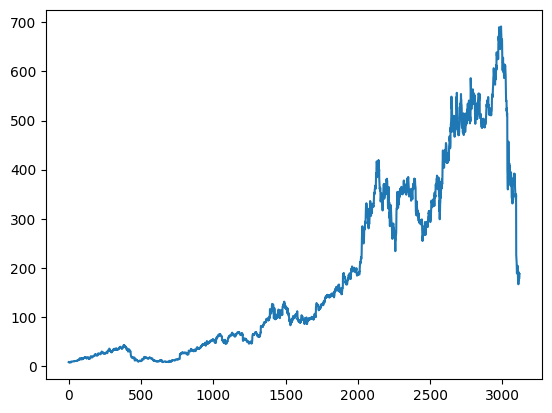

In [11]:
plt.plot(data)

In [12]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [13]:
print(data)

[[0.00090763]
 [0.00049659]
 [0.00087425]
 ...
 [0.25773154]
 [0.26192335]
 [0.26351535]]


In [14]:
# Split the data into training and testing sets
training_size = int(len(data)*0.65)
test_size = len(data) - training_size
train_data, test_data = data[0:training_size,:],data[training_size:len(data),:1]

In [15]:
training_size,test_size

(2027, 1092)

In [16]:
train_data

array([[0.00090763],
       [0.00049659],
       [0.00087425],
       ...,
       [0.31155299],
       [0.31174287],
       [0.32214201]])

In [17]:
# Create sequences for training
import numpy

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(1926, 100)
(1926,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(991, 100)
(991,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
# Build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
61/61 [==============================] - 27s 222ms/step - loss: 0.0015
Epoch 2/100
61/61 [==============================] - 13s 216ms/step - loss: 7.8282e-05
Epoch 3/100
61/61 [==============================] - 13s 220ms/step - loss: 7.6509e-05
Epoch 4/100
61/61 [==============================] - 14s 225ms/step - loss: 7.5610e-05
Epoch 5/100
61/61 [==============================] - 13s 212ms/step - loss: 7.3176e-05
Epoch 6/100
61/61 [==============================] - 12s 201ms/step - loss: 7.4439e-05
Epoch 7/100
61/61 [==============================] - 11s 172ms/step - loss: 6.8773e-05
Epoch 8/100
61/61 [==============================] - 11s 178ms/step - loss: 5.8600e-05
Epoch 9/100
61/61 [==============================] - 10s 165ms/step - loss: 6.2939e-05
Epoch 10/100
61/61 [==============================] - 11s 174ms/step - loss: 5.7064e-05
Epoch 11/100
61/61 [==============================] - 10s 170ms/step - loss: 5.5479e-05
Epoch 12/100
61/61 [=========================

In [26]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


31/31 [==============================] - 2s 72ms/step


In [27]:
# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform(test_predict )

In [28]:
# Ca.melculate RMSE performance matrix
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

85.85392578618547

In [29]:
# Test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

420.6062069152125

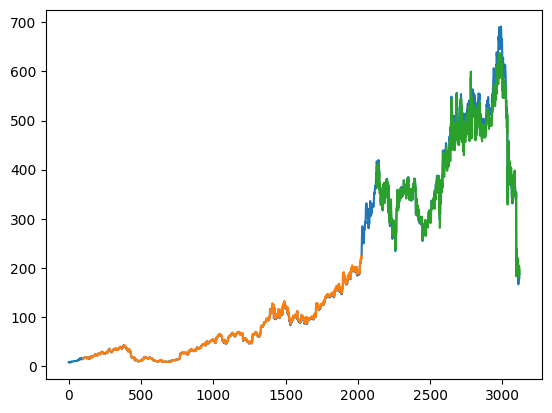

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

1092

In [32]:
x_input=test_data[992:].reshape(1,-1)
x_input.shape

(1, 100)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input

[0.8837398912880883,
 0.8696455029974808,
 0.8622404810111025,
 0.8531558738281866,
 0.8186429630653013,
 0.7978592099310187,
 0.7799966565276475,
 0.7782293533436476,
 0.7796753768743125,
 0.7743880874737417,
 0.7480689536759713,
 0.7575479383482556,
 0.7358002600812475,
 0.7431906619161972,
 0.7320758634078306,
 0.5703194427576458,
 0.5552026940057908,
 0.5249254251416252,
 0.5151104968479399,
 0.5545454707310549,
 0.5511277335595444,
 0.6136103026620954,
 0.6574123201585724,
 0.6170279945564137,
 0.5821499436859079,
 0.5888246883781543,
 0.5770380026269856,
 0.5791265854643202,
 0.5927973997793402,
 0.5831284904306164,
 0.5612786069351855,
 0.5689611372144429,
 0.5848665533117592,
 0.571166545431629,
 0.5545016555539615,
 0.5612494119095206,
 0.5409330917445567,
 0.5264443697812183,
 0.5594090985227627,
 0.5605337094896251,
 0.56596697401852,
 0.5538735834882527,
 0.5448035526401275,
 0.5273353314489325,
 0.5180754212015601,
 0.501322858613623,
 0.4889081446133831,
 0.51378138779095

In [35]:


# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.2820435]
101
1 day input [0.8696455  0.86224048 0.85315587 0.81864296 0.79785921 0.77999666
 0.77822935 0.77967538 0.77438809 0.74806895 0.75754794 0.73580026
 0.74319066 0.73207586 0.57031944 0.55520269 0.52492543 0.5151105
 0.55454547 0.55112773 0.6136103  0.65741232 0.61702799 0.58214994
 0.58882469 0.577038   0.57912659 0.5927974  0.58312849 0.56127861
 0.56896114 0.58486655 0.57116655 0.55450166 0.56124941 0.54093309
 0.52644437 0.5594091  0.56053371 0.56596697 0.55387358 0.54480355
 0.52733533 0.51807542 0.50132286 0.48890814 0.51378139 0.51083104
 0.48680494 0.47320718 0.49181463 0.51194107 0.53219896 0.54563608
 0.53685813 0.54902458 0.53671207 0.53849395 0.53577734 0.54258353
 0.5620235  0.54690675 0.53685813 0.53522232 0.56155612 0.54497881
 0.52774429 0.51868883 0.50953117 0.49802199 0.49232584 0.50157113
 0.48798799 0.48321195 0.49891291 0.32011184 0.30847122 0.30452772
 0.29633401 0.27952302 0.26512195 0.28115885 0.26778017 0.28107122
 0.28167003 0.28771673 0.26480064 0

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
len(data)

3119

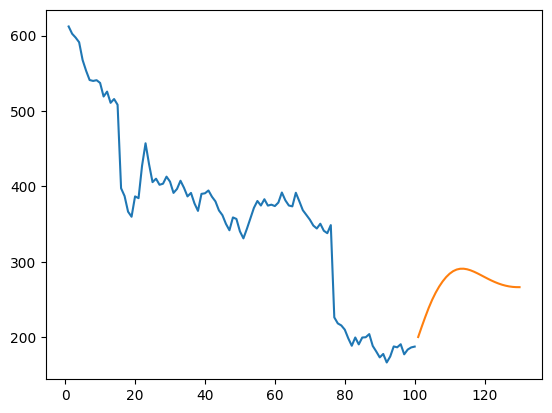

In [38]:
plt.plot(day_new,scaler.inverse_transform(data[3019:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

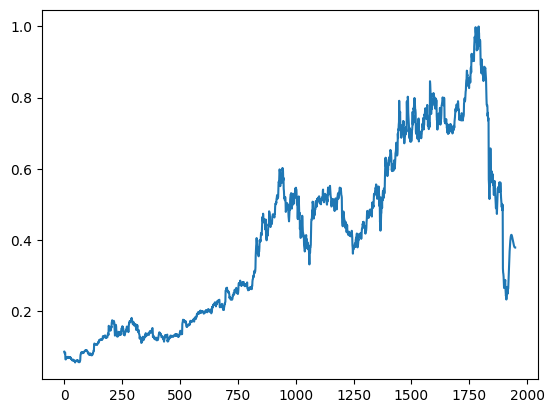

In [39]:
df3=data.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [40]:


df3=scaler.inverse_transform(df3).tolist()



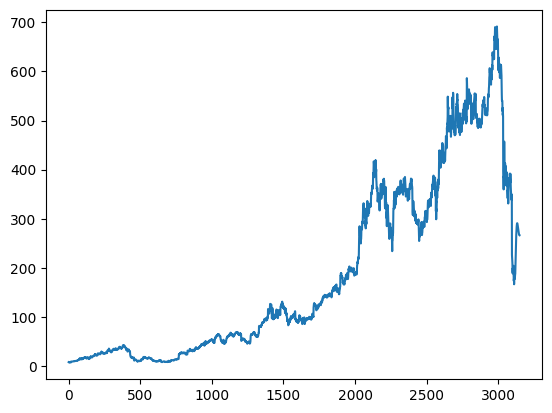

In [41]:
plt.plot(df3)